[Iteration]    0: [Cost] 1.10e+02 [dj_dw]: -3.706e+02 [dj_db]: -1.402e+01 [w]:  3.706e-03 [b]: 1.40225e-04
[Iteration]  100: [Cost] 4.08e+01 [dj_dw]: -1.726e+02 [dj_db]: -7.961e+00 [w]:  2.618e-01 [b]: 1.07194e-02
[Iteration]  200: [Cost] 2.57e+01 [dj_dw]: -8.033e+01 [dj_db]: -5.137e+00 [w]:  3.820e-01 [b]: 1.70765e-02
[Iteration]  300: [Cost] 2.24e+01 [dj_dw]: -3.737e+01 [dj_db]: -3.822e+00 [w]:  4.379e-01 [b]: 2.14667e-02
[Iteration]  400: [Cost] 2.17e+01 [dj_dw]: -1.736e+01 [dj_db]: -3.209e+00 [w]:  4.639e-01 [b]: 2.49407e-02
[Iteration]  500: [Cost] 2.15e+01 [dj_dw]: -8.040e+00 [dj_db]: -2.923e+00 [w]:  4.760e-01 [b]: 2.79874e-02
[Iteration]  600: [Cost] 2.15e+01 [dj_dw]: -3.701e+00 [dj_db]: -2.790e+00 [w]:  4.816e-01 [b]: 3.08348e-02
[Iteration]  700: [Cost] 2.15e+01 [dj_dw]: -1.680e+00 [dj_db]: -2.727e+00 [w]:  4.841e-01 [b]: 3.35889e-02
[Iteration]  800: [Cost] 2.15e+01 [dj_dw]: -7.387e-01 [dj_db]: -2.697e+00 [w]:  4.853e-01 [b]: 3.62991e-02
[Iteration]  900: [Cost] 2.14e+01 [dj

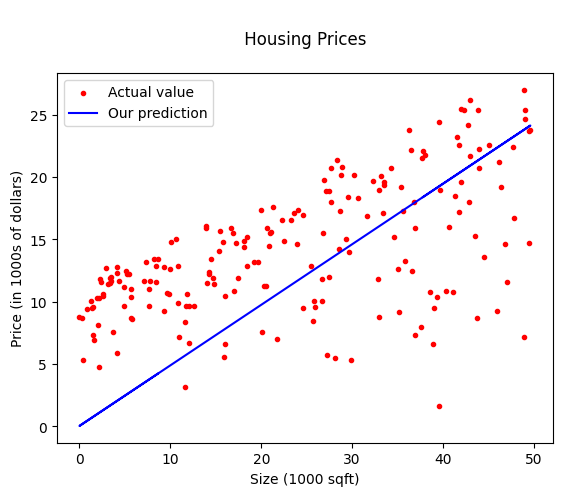

In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt


# Function to calculate the cost
def compute_cost(x, y, w, b):

    m = x.shape[0]
    cost = 0

    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2

    total_cost = 1 / (2 * m) * cost

    return total_cost

# compute the gradient for W and b


def compute_gradient(x, y, w, b):
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """

    # Number of training examples
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]

        dj_db += dj_db_i
        dj_dw += dj_dw_i

    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db


# iterate for N number of times and update W and b with learning rate alpha
# So its end result W and b are used to predict the price of the house
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha

    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient

    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """

    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in

    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w, b)

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db
        w = w - alpha * dj_dw

        # Save cost J at each iteration
        if i < 100000:      # prevent resource exhaustion
            J_history.append(cost_function(x, y, w, b))
            p_history.append([w, b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i % math.ceil(num_iters/10) == 0:
            print(
                f"[Iteration] {i:4}: [Cost] {J_history[-1]:0.2e} [dj_dw]: {dj_dw: 0.3e} [dj_db]: {dj_db: 0.3e} [w]: {w: 0.3e} [b]:{b: 0.5e}")

    return w, b, J_history, p_history  # return w and J,w history for graphing


# calculate the price
def predict_price(x, w, b):
    m = x.shape[0]
    f_wb = np.zeros(m, np.longdouble)

    for i in range(m):
        f_wb[i] = x[i]*w + b

    return f_wb


# Sample training data
x_sqft_size = np.array([37.8, 39.3, 45.9, 41.3, 10.8, 48.9, 32.8, 19.6, 2.1, 2.6, 5.8, 24.0, 35.1, 7.6, 32.9, 47.7, 36.6, 39.6, 20.5, 23.9, 27.7, 5.1, 15.9, 16.9, 12.6, 3.5, 29.3, 16.7, 27.1, 16.0, 28.3, 17.4, 1.5, 20.0, 1.4, 4.1, 43.8, 49.4, 26.7, 37.7, 22.3, 33.4, 27.7, 8.4, 25.7, 22.5, 9.9, 41.5, 15.8, 11.7, 3.1, 9.6, 41.7, 46.2, 28.8, 49.4, 28.1, 19.2, 49.6, 29.5, 2.0, 42.7, 15.5, 29.6, 42.8, 9.3, 24.6, 14.5, 27.5, 43.9, 30.6, 14.3, 33.0, 5.7, 24.6, 43.7, 1.6, 28.5, 29.9, 7.7, 26.7, 4.1, 20.3, 44.5, 43.0, 18.4, 27.5, 40.6, 25.5, 47.8, 4.9, 1.5, 33.5, 36.5, 14.0, 31.6, 3.5, 21.0,
                        42.3, 41.7, 4.3, 36.3, 10.1, 17.2, 34.3, 46.4, 11.0, 0.3, 0.4, 26.9, 8.2, 38.0, 15.4, 20.6, 46.8, 35.0, 14.3, 0.8, 36.9, 16.0, 26.8, 21.7, 2.4, 34.6, 32.3, 11.8, 38.9, 0.0, 49.0, 12.0, 39.6, 2.9, 27.2, 33.5, 38.6, 47.0, 39.0, 28.9, 25.9, 43.9, 17.0, 35.4, 33.2, 5.7, 14.8, 1.9, 7.3, 49.0, 40.3, 25.8, 13.9, 8.4, 23.3, 39.7, 21.1, 11.6, 43.5, 1.3, 36.9, 18.4, 18.1, 35.8, 18.1, 36.8, 14.7, 3.4, 37.6, 5.2, 23.6, 10.6, 11.6, 20.9, 20.1, 7.1, 3.4, 48.9, 30.2, 7.8, 2.3, 10.0, 2.6, 5.4, 5.7, 43.0, 21.3, 45.1, 2.1, 28.7, 13.9, 12.1, 41.1, 10.8, 4.1, 42.0, 35.6, 3.7, 4.9, 9.3, 42.0, 8.6])
y_price = np.array([22.1, 10.4, 9.3, 18.5, 12.9, 7.2, 11.8, 13.2, 4.8, 10.6, 8.6, 17.4, 9.2, 9.7, 19.0, 22.4, 12.5, 24.4, 11.3, 14.6, 18.0, 12.5, 5.6, 15.5, 9.7, 12.0, 15.0, 15.9, 18.9, 10.5, 21.4, 11.9, 9.6, 17.4, 9.5, 12.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7, 12.9, 8.5, 14.9, 10.6, 23.2, 14.8, 9.7, 11.4, 10.7, 22.6, 21.2, 20.2, 23.7, 5.5, 13.2, 23.8, 18.4, 8.1, 24.2, 15.7, 14.0, 18.0, 9.3, 9.5, 13.4, 18.9, 22.3, 18.3, 12.4, 8.8, 11.0, 17.0, 8.7, 6.9, 14.2, 5.3, 11.0, 11.8, 12.3, 11.3, 13.6, 21.7, 15.2, 12.0, 16.0, 12.9, 16.7, 11.2, 7.3, 19.4, 22.2, 11.5, 16.9, 11.7, 15.5,
                   25.4, 17.2, 11.7, 23.8, 14.8, 14.7, 20.7, 19.2, 7.2, 8.7, 5.3, 19.8, 13.4, 21.8, 14.1, 15.9, 14.6, 12.6, 12.2, 9.4, 15.9, 6.6, 15.5, 7.0, 11.6, 15.2, 19.7, 10.6, 6.6, 8.8, 24.7, 9.7, 1.6, 12.7, 5.7, 19.6, 10.8, 11.6, 9.5, 20.8, 9.6, 20.7, 10.9, 19.2, 20.1, 10.4, 11.4, 10.3, 13.2, 25.4, 10.9, 10.1, 16.1, 11.6, 16.6, 19.0, 15.6, 3.2, 15.3, 10.1, 7.3, 12.9, 14.4, 13.3, 14.9, 18.0, 11.9, 11.9, 8.0, 12.2, 17.1, 15.0, 8.4, 14.5, 7.6, 11.7, 11.5, 27.0, 20.2, 11.7, 11.8, 12.6, 10.5, 12.2, 8.7, 26.2, 17.6, 22.6, 10.3, 17.3, 15.9, 6.7, 10.8, 9.9, 5.9, 19.6, 17.3, 7.6, 9.7, 12.8, 25.5, 13.4])

# some gradient descent settings
w_init = 0
b_init = 0
iterations = 1000
alpha = 1.0e-5


# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_sqft_size, y_price, w_init, b_init, alpha, iterations, compute_cost, compute_gradient)
print(f"\n(w,b) found by gradient descent:\nW = {w_final:8.4f} and \nb = {b_final:8.4f})")

#visualize the input data and our prediction
plt.scatter(x_sqft_size, y_price, marker='.', c='red',label="Actual value")  # scatter the training set
plt.plot(x_sqft_size, predict_price(x_sqft_size, w_final, b_final), c='blue',label="Our prediction")  # plot the grap of
plt.title("\n Housing Prices \n")  # Set the title
plt.ylabel('Price (in 1000s of dollars)')  # Set the y-axis label
plt.xlabel('Size (1000 sqft)')  # Set the x-axis label
plt.legend()
plt.show()
